In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
 
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold

import matplotlib.ticker as ticker

In [2]:
inversores = pd.read_csv('../data2/datos_socioeconomicos.csv', index_col = 0 )
inversores

,HHSEX,AGECL,EDCL,MARRIED,KIDS,RACE,OCCAT1,KNOWL,YESFINRISK,NOFINRISK,NWCAT,INCCAT,Tolerancia_riesgo
0,2,6,4,2,0,1,1,6,0,0,5,3,0.926181
1,2,6,4,2,0,1,1,6,0,0,5,3,0.919388
2,2,6,4,2,0,1,1,6,0,0,5,3,0.921627
3,2,6,4,2,0,1,1,6,0,0,5,2,0.944681
4,2,6,4,2,0,1,1,6,0,0,5,3,0.925676
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28880,1,3,1,1,0,1,2,7,0,1,5,6,0.693498
28881,1,3,1,1,0,1,2,7,0,1,5,6,0.697253
28882,1,3,1,1,0,1,2,7,0,1,5,6,0.690558
28883,1,3,1,1,0,1,2,7,0,1,5,6,0.708311


In [3]:
inversores.describe()

,HHSEX,AGECL,EDCL,MARRIED,KIDS,RACE,OCCAT1,KNOWL,YESFINRISK,NOFINRISK,NWCAT,INCCAT,Tolerancia_riesgo
count,28532.000000,28532.000000,28532.000000,28532.000000,28532.000000,28532.000000,28532.000000,28532.000000,28532.000000,28532.000000,28532.000000,28532.000000,28532.000000
mean,1.221926,3.394715,3.086640,1.372634,0.749159,1.544371,1.794161,7.409961,0.049593,0.311335,3.095962,3.681200,0.414845
std,0.415549,1.546389,1.002185,0.483514,1.124878,1.059825,0.919037,2.151052,0.217107,0.463047,1.505394,1.798537,0.432518
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,-0.158088
25%,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,1.000000,3.000000,3.000000,1.000000,0.000000,1.000000,1.000000,8.000000,0.000000,0.000000,3.000000,4.000000,0.204529
75%,1.000000,5.000000,4.000000,2.000000,1.000000,2.000000,3.000000,9.000000,0.000000,1.000000,5.000000,6.000000,0.907029
max,2.000000,6.000000,4.000000,2.000000,7.000000,5.000000,4.000000,10.000000,1.000000,1.000000,5.000000,6.000000,1.000000


<AxesSubplot:title={'center':'Correlation Matrix'}>

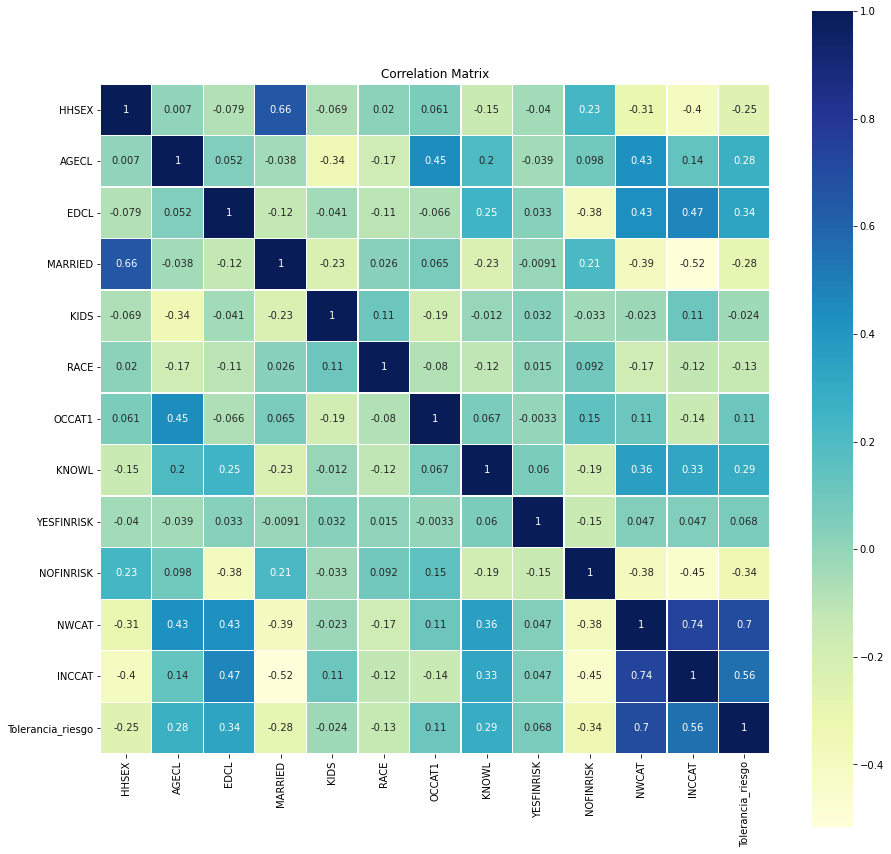

In [4]:
correlation = inversores.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='YlGnBu', linewidths=.3)

In [5]:
print('Null Values =',inversores.isnull().values.any())

Null Values = False


In [6]:
import copy
inversores2 = copy.deepcopy(inversores) 

In [7]:
inversores2=inversores2.drop(['Tolerancia_riesgo'], axis=1)
inversores2

,HHSEX,AGECL,EDCL,MARRIED,KIDS,RACE,OCCAT1,KNOWL,YESFINRISK,NOFINRISK,NWCAT,INCCAT
0,2,6,4,2,0,1,1,6,0,0,5,3
1,2,6,4,2,0,1,1,6,0,0,5,3
2,2,6,4,2,0,1,1,6,0,0,5,3
3,2,6,4,2,0,1,1,6,0,0,5,2
4,2,6,4,2,0,1,1,6,0,0,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
28880,1,3,1,1,0,1,2,7,0,1,5,6
28881,1,3,1,1,0,1,2,7,0,1,5,6
28882,1,3,1,1,0,1,2,7,0,1,5,6
28883,1,3,1,1,0,1,2,7,0,1,5,6


In [11]:
dummies=pd.get_dummies(inversores2, columns = ['HHSEX','AGECL','EDCL','MARRIED','KIDS','RACE','OCCAT1','KNOWL','YESFINRISK','NOFINRISK','NWCAT','INCCAT'])
dummies

,HHSEX_1,HHSEX_2,AGECL_1,AGECL_2,AGECL_3,AGECL_4,AGECL_5,AGECL_6,EDCL_1,EDCL_2,...,NWCAT_2,NWCAT_3,NWCAT_4,NWCAT_5,INCCAT_1,INCCAT_2,INCCAT_3,INCCAT_4,INCCAT_5,INCCAT_6
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28880,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
28881,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
28882,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
28883,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_rescaled = scaler.fit_transform(dummies)

data_rescaled

array([[-1.87243191,  1.87243191, -0.41980684, ..., -0.45282592,
        -0.33247593, -0.59359555],
       [-1.87243191,  1.87243191, -0.41980684, ..., -0.45282592,
        -0.33247593, -0.59359555],
       [-1.87243191,  1.87243191, -0.41980684, ..., -0.45282592,
        -0.33247593, -0.59359555],
       ...,
       [ 0.53406481, -0.53406481, -0.41980684, ..., -0.45282592,
        -0.33247593,  1.68464876],
       [ 0.53406481, -0.53406481, -0.41980684, ..., -0.45282592,
        -0.33247593,  1.68464876],
       [ 0.53406481, -0.53406481, -0.41980684, ..., -0.45282592,
        -0.33247593,  1.68464876]])

In [15]:
import umap

reducer = umap.UMAP(random_state=42)
reducer.fit(data_rescaled.data)

/home/jaimegarcia/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/jaimegarcia/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/jaimegarcia/miniconda3/envs/ironhack_env/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/jaimegarcia/miniconda3/envs/ironhack_env/lib/python3.8/site-package

UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42)

In [16]:
embedding = reducer.transform(data_rescaled.data)

embedding

array([[-5.553486  ,  4.857108  ],
       [-5.5531783 ,  4.857526  ],
       [-5.553988  ,  4.857622  ],
       ...,
       [ 0.47864777, 13.705715  ],
       [ 0.4775998 , 13.70624   ],
       [ 0.47849485, 13.705789  ]], dtype=float32)

In [17]:
embedding.shape

(28532, 2)

In [18]:
nclust=7

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=nclust).fit(embedding.data)

kmeans

KMeans(n_clusters=7)

In [20]:
target_labels=kmeans.predict(embedding.data)
target_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

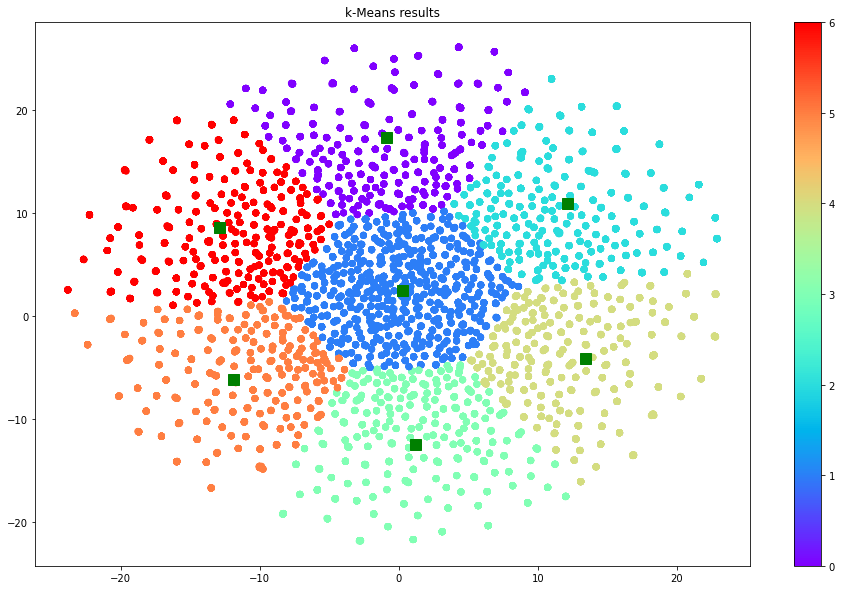

In [21]:
centroids = kmeans.cluster_centers_
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(embedding[:,0],embedding[:,1], c = kmeans.labels_, cmap ="rainbow")
ax.set_title('k-Means results')
plt.colorbar(scatter)

plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)

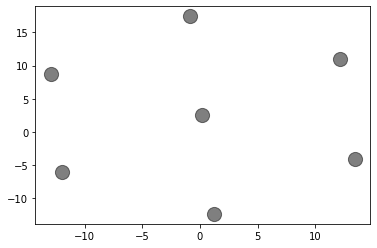

In [22]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

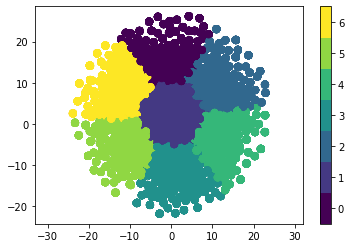

In [23]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=target_labels, s=50, cmap='viridis')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(kmeans.n_clusters + 1) - 0.5).set_ticks(np.arange(kmeans.n_clusters))

In [24]:
from sklearn import metrics
print("kmeans", metrics.silhouette_score(embedding, kmeans.labels_, metric='euclidean'))

kmeans 0.34462634


In [25]:
inversores2['Clusters'] =target_labels
inversores2

,HHSEX,AGECL,EDCL,MARRIED,KIDS,RACE,OCCAT1,KNOWL,YESFINRISK,NOFINRISK,NWCAT,INCCAT,Clusters
0,2,6,4,2,0,1,1,6,0,0,5,3,1
1,2,6,4,2,0,1,1,6,0,0,5,3,1
2,2,6,4,2,0,1,1,6,0,0,5,3,1
3,2,6,4,2,0,1,1,6,0,0,5,2,1
4,2,6,4,2,0,1,1,6,0,0,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28880,1,3,1,1,0,1,2,7,0,1,5,6,0
28881,1,3,1,1,0,1,2,7,0,1,5,6,0
28882,1,3,1,1,0,1,2,7,0,1,5,6,0
28883,1,3,1,1,0,1,2,7,0,1,5,6,0


In [26]:
cluster0=inversores2[inversores2.Clusters == 0]
a=cluster0.mean()
a

HHSEX         1.159858
AGECL         3.358932
EDCL          3.094499
MARRIED       1.294118
KIDS          0.745643
RACE          1.501362
OCCAT1        1.709967
KNOWL         7.665305
YESFINRISK    0.036765
NOFINRISK     0.245370
NWCAT         3.258170
INCCAT        3.852124
Clusters      0.000000
dtype: float64

In [27]:
cluster1=inversores2[inversores2.Clusters == 1]
b=cluster1.mean()
b

HHSEX         1.282581
AGECL         3.219355
EDCL          2.914286
MARRIED       1.431521
KIDS          0.921475
RACE          1.759078
OCCAT1        1.769770
KNOWL         6.891429
YESFINRISK    0.058065
NOFINRISK     0.373456
NWCAT         2.641106
INCCAT        3.233548
Clusters      1.000000
dtype: float64

In [28]:
cluster2=inversores2[inversores2.Clusters == 2]
c=cluster2.mean()
c

HHSEX         1.198843
AGECL         3.381641
EDCL          3.127301
MARRIED       1.366649
KIDS          0.740926
RACE          1.543135
OCCAT1        1.771962
KNOWL         7.546817
YESFINRISK    0.051289
NOFINRISK     0.278012
NWCAT         3.089164
INCCAT        3.820358
Clusters      2.000000
dtype: float64

In [29]:
cluster3=inversores2[inversores2.Clusters == 3]
d=cluster3.mean()
d

HHSEX         1.247558
AGECL         3.358612
EDCL          3.052699
MARRIED       1.365810
KIDS          0.771979
RACE          1.464781
OCCAT1        1.762982
KNOWL         7.331105
YESFINRISK    0.064267
NOFINRISK     0.350386
NWCAT         3.056298
INCCAT        3.714910
Clusters      3.000000
dtype: float64

In [30]:
cluster4=inversores2[inversores2.Clusters == 4]
e=cluster4.mean()
e

HHSEX         1.236822
AGECL         3.451016
EDCL          3.172024
MARRIED       1.384418
KIDS          0.681666
RACE          1.431731
OCCAT1        1.825919
KNOWL         7.549499
YESFINRISK    0.084855
NOFINRISK     0.284906
NWCAT         3.231165
INCCAT        3.646182
Clusters      4.000000
dtype: float64

In [31]:
cluster5=inversores2[inversores2.Clusters == 5]
f=cluster5.mean()
f

HHSEX         1.187548
AGECL         3.449190
EDCL          3.222279
MARRIED       1.355030
KIDS          0.649344
RACE          1.446360
OCCAT1        1.826344
KNOWL         7.788269
YESFINRISK    0.019295
NOFINRISK     0.299974
NWCAT         3.287625
INCCAT        3.878827
Clusters      5.000000
dtype: float64

In [32]:
cluster6=inversores2[inversores2.Clusters == 6]
g=cluster6.mean()
g

HHSEX         1.212503
AGECL         3.607008
EDCL          3.092765
MARRIED       1.382909
KIDS          0.666247
RACE          1.576254
OCCAT1        1.894631
KNOWL         7.321402
YESFINRISK    0.028989
NOFINRISK     0.318125
NWCAT         3.292917
INCCAT        3.809428
Clusters      6.000000
dtype: float64

In [33]:
cluster_output=pd.concat([a,b,c,d,e,f,g],axis=1)
cluster_output

,0,1,2,3,4,5,6
HHSEX,1.159858,1.282581,1.198843,1.247558,1.236822,1.187548,1.212503
AGECL,3.358932,3.219355,3.381641,3.358612,3.451016,3.449190,3.607008
EDCL,3.094499,2.914286,3.127301,3.052699,3.172024,3.222279,3.092765
MARRIED,1.294118,1.431521,1.366649,1.365810,1.384418,1.355030,1.382909
KIDS,0.745643,0.921475,0.740926,0.771979,0.681666,0.649344,0.666247
RACE,1.501362,1.759078,1.543135,1.464781,1.431731,1.446360,1.576254
OCCAT1,1.709967,1.769770,1.771962,1.762982,1.825919,1.826344,1.894631
KNOWL,7.665305,6.891429,7.546817,7.331105,7.549499,7.788269,7.321402
YESFINRISK,0.036765,0.058065,0.051289,0.064267,0.084855,0.019295,0.028989
NOFINRISK,0.245370,0.373456,0.278012,0.350386,0.284906,0.299974,0.318125


In [34]:
cluster_output=cluster_output.drop(['Clusters'],axis=0)
cluster_output

,0,1,2,3,4,5,6
HHSEX,1.159858,1.282581,1.198843,1.247558,1.236822,1.187548,1.212503
AGECL,3.358932,3.219355,3.381641,3.358612,3.451016,3.449190,3.607008
EDCL,3.094499,2.914286,3.127301,3.052699,3.172024,3.222279,3.092765
MARRIED,1.294118,1.431521,1.366649,1.365810,1.384418,1.355030,1.382909
KIDS,0.745643,0.921475,0.740926,0.771979,0.681666,0.649344,0.666247
RACE,1.501362,1.759078,1.543135,1.464781,1.431731,1.446360,1.576254
OCCAT1,1.709967,1.769770,1.771962,1.762982,1.825919,1.826344,1.894631
KNOWL,7.665305,6.891429,7.546817,7.331105,7.549499,7.788269,7.321402
YESFINRISK,0.036765,0.058065,0.051289,0.064267,0.084855,0.019295,0.028989
NOFINRISK,0.245370,0.373456,0.278012,0.350386,0.284906,0.299974,0.318125


In [35]:
cluster_output=cluster_output.T
cluster_output

,HHSEX,AGECL,EDCL,MARRIED,KIDS,RACE,OCCAT1,KNOWL,YESFINRISK,NOFINRISK,NWCAT,INCCAT
0,1.159858,3.358932,3.094499,1.294118,0.745643,1.501362,1.709967,7.665305,0.036765,0.245370,3.258170,3.852124
1,1.282581,3.219355,2.914286,1.431521,0.921475,1.759078,1.769770,6.891429,0.058065,0.373456,2.641106,3.233548
2,1.198843,3.381641,3.127301,1.366649,0.740926,1.543135,1.771962,7.546817,0.051289,0.278012,3.089164,3.820358
3,1.247558,3.358612,3.052699,1.365810,0.771979,1.464781,1.762982,7.331105,0.064267,0.350386,3.056298,3.714910
4,1.236822,3.451016,3.172024,1.384418,0.681666,1.431731,1.825919,7.549499,0.084855,0.284906,3.231165,3.646182
5,1.187548,3.449190,3.222279,1.355030,0.649344,1.446360,1.826344,7.788269,0.019295,0.299974,3.287625,3.878827
6,1.212503,3.607008,3.092765,1.382909,0.666247,1.576254,1.894631,7.321402,0.028989,0.318125,3.292917,3.809428


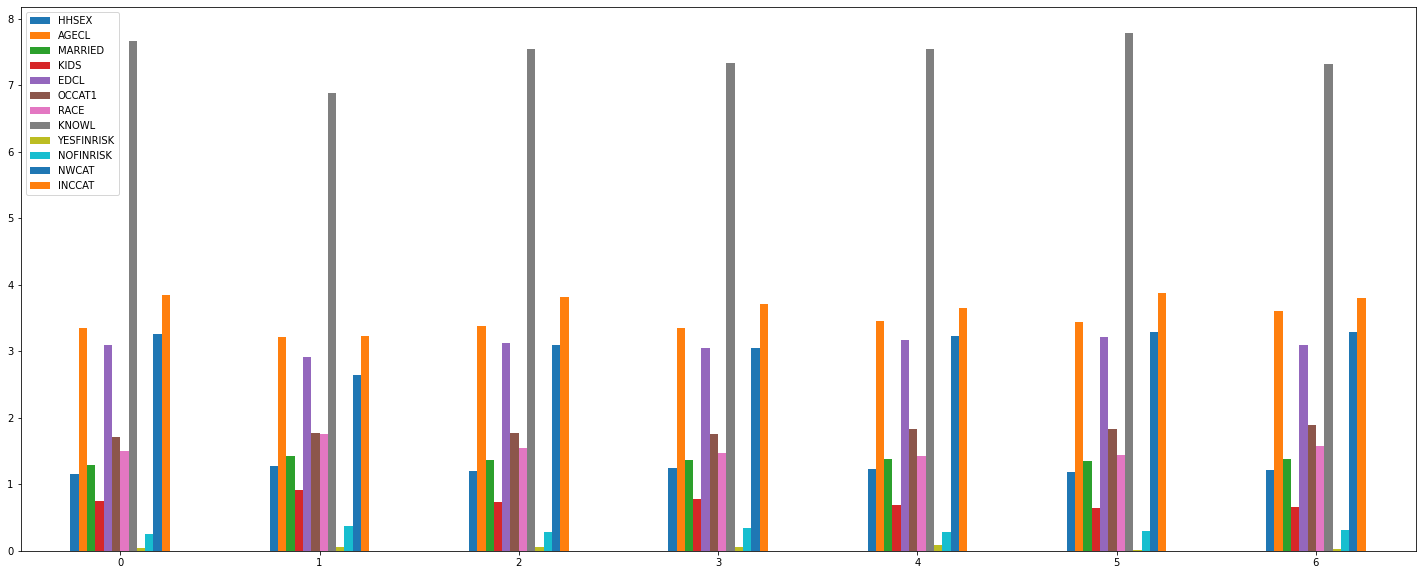

In [36]:
cluster_output[['HHSEX','AGECL','MARRIED','KIDS','EDCL','OCCAT1','RACE','KNOWL','YESFINRISK','NOFINRISK','NWCAT','INCCAT']].plot.bar(rot=0, figsize=(25,10));

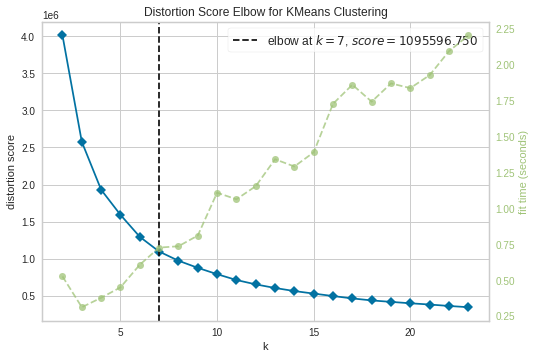

In [37]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k=(2,24))

visualizer.fit(embedding)
visualizer.show();